In [81]:
#1. The data file contains information from UCR students in CS105 and CS111.
#The data used in this lab will be from the average commute time of students and their stress levels.
#
#2. From the data, we would like to know whether there is a correlation with the 
#stress levels of students and their average roundtrip commute time. If so,
#what is that correlation?

In [82]:
#3 Compute differing data distributions into visuals
import pandas as pd
import numpy as np

df = pd.read_csv("survey.csv")

<AxesSubplot:xlabel='commute'>

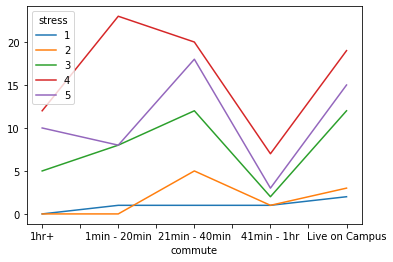

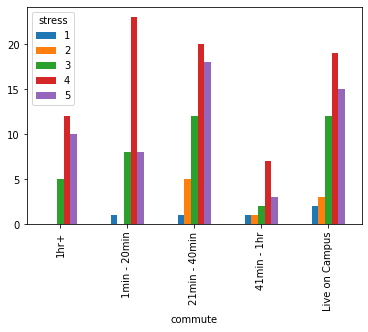

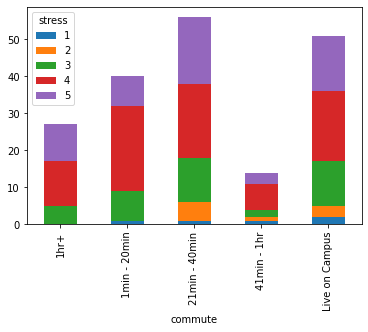

In [83]:
df
df['stress']= df.filter(items = ['Rate your stress levels this quarter. 1 being not stressed, 5 being the most stressed.'])
df['commute']= df.filter(items = ['How many minutes on average is your roundtrip commute to school daily?.1'])
df = df.filter(items = ['commute', 'stress'])
commVstress = pd.crosstab(df.commute, df.stress)
commVstress.plot();
commVstress.plot.bar();
commVstress.plot.bar(stacked = True)

<AxesSubplot:xlabel='commute,stress'>

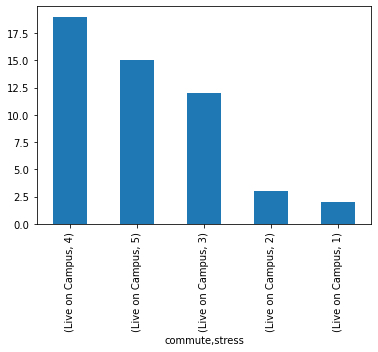

In [84]:
df0 = df.loc[df['commute'] == 'Live on Campus']
df0.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

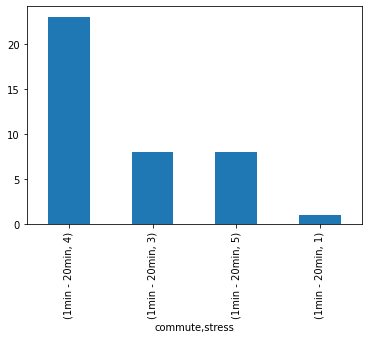

In [85]:
df1 = df.loc[df['commute'] == '1min - 20min']
df1.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

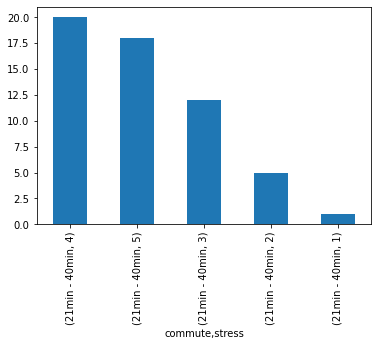

In [86]:
df2 = df.loc[df['commute'] == '21min - 40min']
df2.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

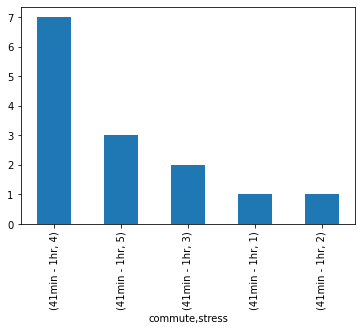

In [87]:
df3 = df.loc[df['commute'] == '41min - 1hr']
df3.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='commute,stress'>

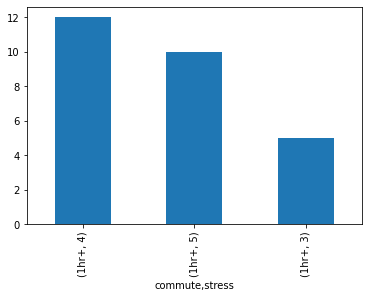

In [88]:
df4 = df.loc[df['commute'] == '1hr+']
df4.value_counts().plot(kind = 'bar')

In [118]:
# we have to filter out the two rows: commute and stress levels and assign numerical values to the commute time instead of ranges
# Chi Squared Test: We want to know the correlation between commute time and stress level. We will be using 0.05 as our p value

# sample_data = df.loc[df['commute']]
# sample_data

import numpy as np
from scipy.stats import chi2_contingency # for chi-squared test

df['commute'].replace("1hr+", 60, inplace = True)
df['commute'].replace("1min - 20min", 10, inplace = True)
df['commute'].replace("21min - 40min", 30, inplace = True)
df['commute'].replace("41min - 1hr", 50, inplace = True)
df['commute'].replace("Live on Campus", 0, inplace = True)
df['commute']


sample_data = df[['commute' , 'stress']] 
frequency_table = pd.crosstab(sample_data['stress'], sample_data['commute'])
c, p, dof, arr = chi2_contingency(frequency_table)

print("Chi-Squared value is", c)
print("critical value for dof: ", dof, " and alpha: 0.05 is 26.296")
print("Thus, the null hypothesis is accepted since our value is less than our critical value. This means that stress levels and commute are independent. ")


Chi-Squared value is 13.719639250445352
critical value for dof:  16  and alpha: 0.05 is 26.296
Thus, the null hypothesis is accepted since our value is less than our critical value. This means that stress levels and commute are independet. 


In [ ]:
# testing if our function works properly
test_freq_table = frequency_table.head(3)
test_freq_table
chi2_contingency(test_freq_table)